## Chapter 14

### Parametric Plots

Recall that a parametric plot is the set of points where $x=x(t)$ and $y=y(t)$ for $a \leq t \leq b$.  Produce a graph of 

$$ x(t) = e^{-t/20}\cos(t) \qquad y(t) = e^{-t/20} \sin(t) \qquad \text{for $0 \leq t \leq 5\pi$}$$

In [2]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

In [3]:
lines(0..5pi, t->exp(-t/20)*cos(t), t-> exp(-t/20)*sin(t))

ArgumentError: ArgumentError:     Conversion failed for Lines (With conversion trait PointBased()) with args: Tuple{IntervalSets.ClosedInterval{Float64}, var"#11#13", var"#12#14"} .
    Lines requires to convert to argument types Tuple{AbstractVector{<:Union{Point2, Point3}}}, which convert_arguments didn't succeed in.
    To fix this overload convert_arguments(P, args...) for Lines or PointBased() and return an object of type Tuple{AbstractVector{<:Union{Point2, Point3}}}.`


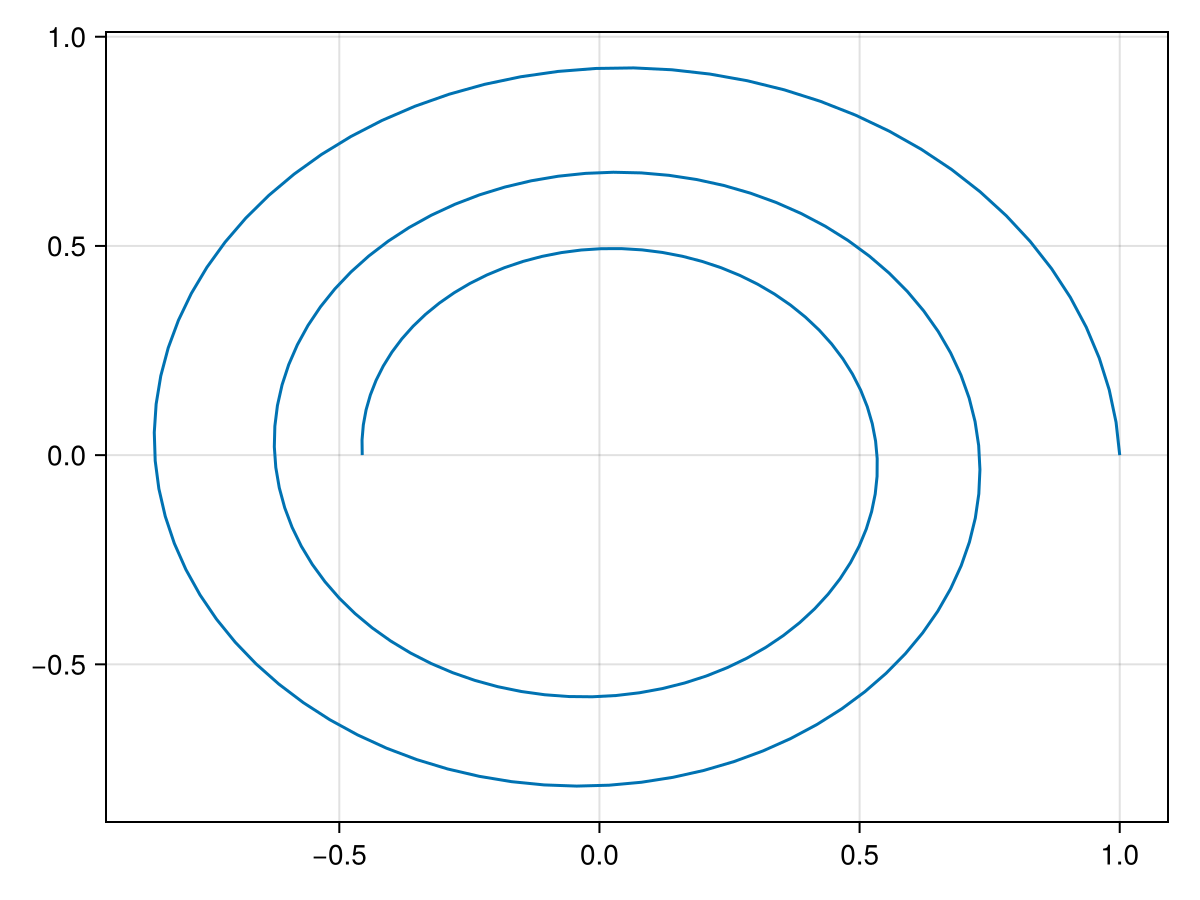

In [7]:
t = LinRange(0,5pi,200)
x = @. exp(-t/20)*cos(t)
y = map(t-> exp(-t/20)*sin(t), t)
lines(x,y)

Produce a graph where $x(t) = 4 \cos t, y(t) = 4 \sin t, z(t) = t/4$ for $0 \leq t \leq 6\pi$

In [10]:
using GLMakie
GLMakie.activate!()
Makie.inline!(false)
t=LinRange(0,6pi,200)
x = 4*cos.(t)
y = 4*sin.(t)
z = t/4
lines(x,y,z)

In [11]:
meshscatter(x,y,z)

## Chapter 16: Advanced Plotting Features of Makie

One example that we will show here is how to write a type recipe, which will allow us to call an existing function (like `lines`) on a new user-defined Data Type.  

Recall that in Chapter 12 we made a `Polynomial` datatype with

In [12]:
struct Polynomial{T <: Number}
  coeffs::Vector{T}
end

It is also helpful to copy over the `Base.show` method and the `eval` method. 

In [16]:
Base.show(io::IO, p::Polynomial) = print(io, mapreduce(n -> "$(p.coeffs[n]) x^$(n-1)", (str, term) -> "$str + $term", 1:length(p.coeffs)))

In [14]:
eval(poly::Polynomial, x::Number) = reduce((val,c) -> x*val+c, reverse(poly.coeffs))

eval (generic function with 2 methods)

And let's test that this works on a polynomial:

In [17]:
poly1=Polynomial([1,2,3])

1 x^0 + 2 x^1 + 3 x^2

Let's load Makie and CairoMakie

In [18]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

Now, we first tell Makie that we want to plot a polynomial with the `lines` method. 

In [6]:
Makie.plottype(::Polynomial) = Makie.Lines

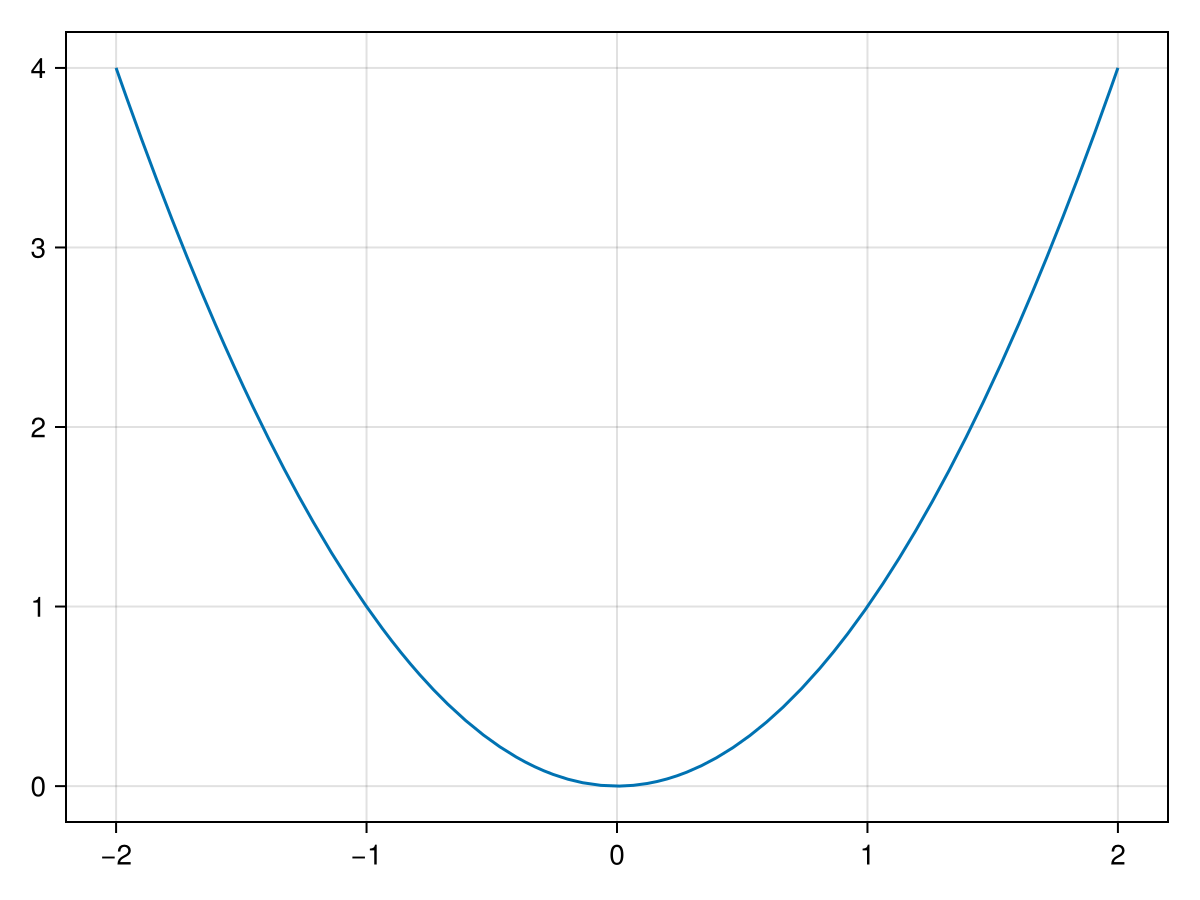

In [19]:
lines(-2..2,x->x^2)

And then we tell Makie how to plot the polynomial with

In [24]:
Makie.convert_arguments(S::Type{<:Lines}, p::Polynomial, domain = -5..5) = Makie.convert_arguments(S, domain, x->eval(p,x))
Makie.convert_arguments(S::Type{<:Lines}, domain, p::Polynomial) = Makie.convert_arguments(S, domain, x->eval(p,x))


All this does is create the arguments to pass to `lines`.  In particular the domain like `-4..2` and the function and we use the Horner method `eval` to do this. 

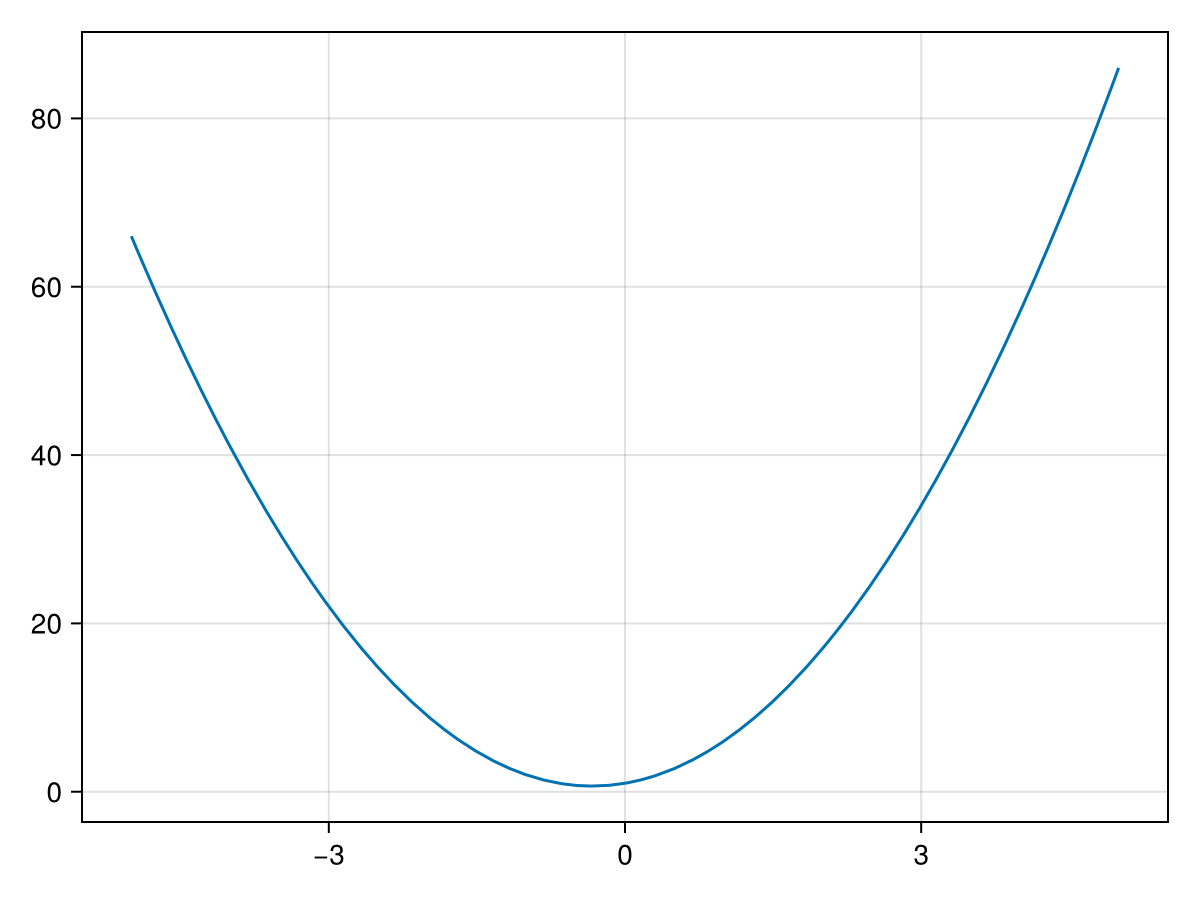

In [21]:
lines(poly1)

And this will use the default plotting domain of `-5..5` otherwise we can add in a different domain.

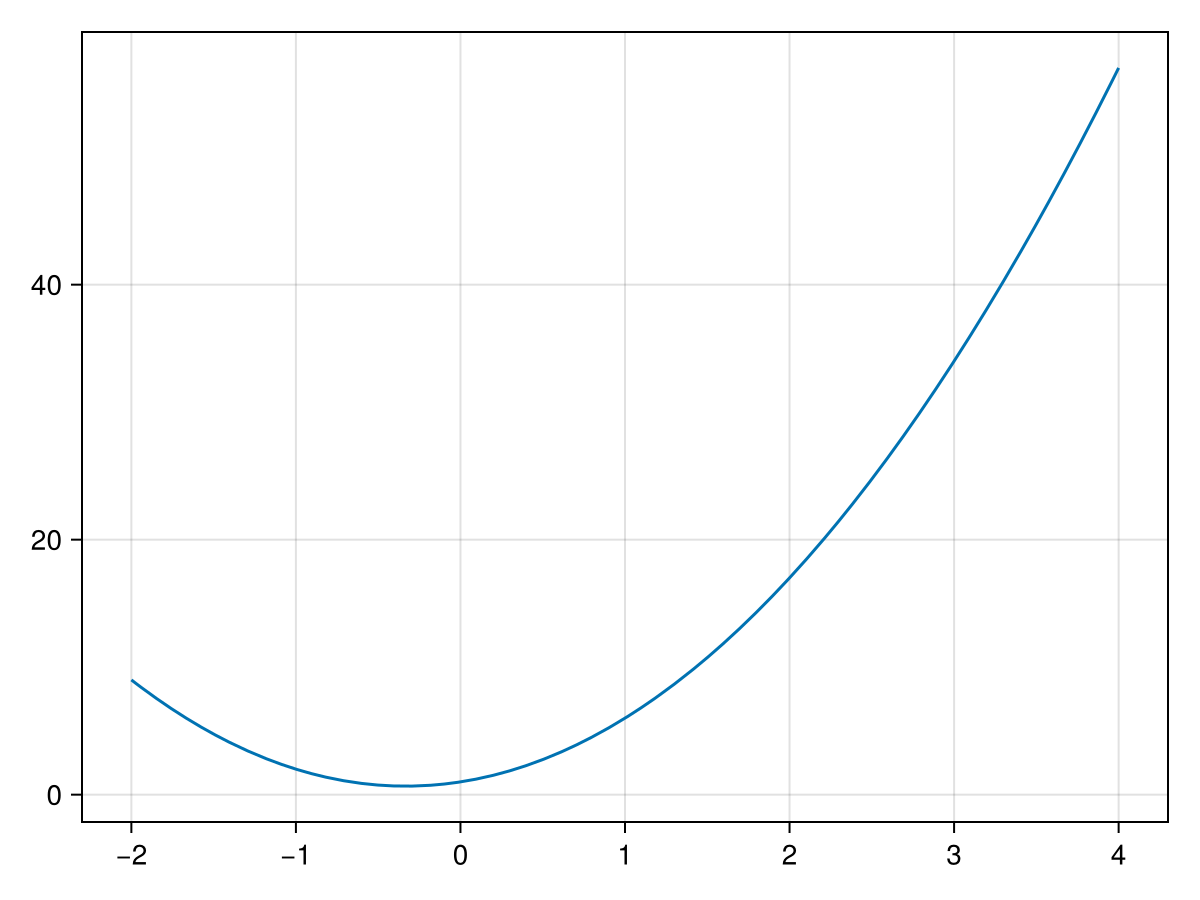

In [22]:
lines(poly1,-2..4)

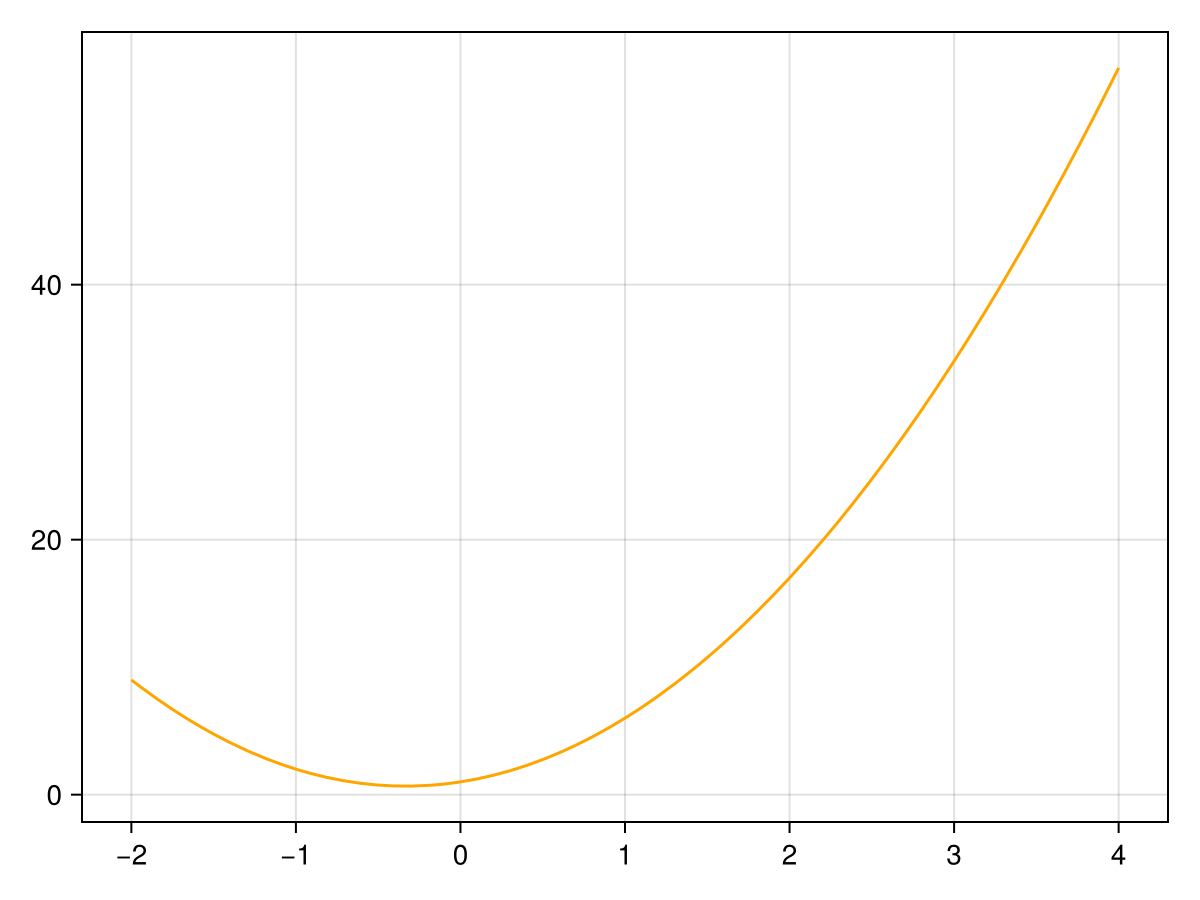

In [23]:
lines(poly1,-2..4,color=:orange)

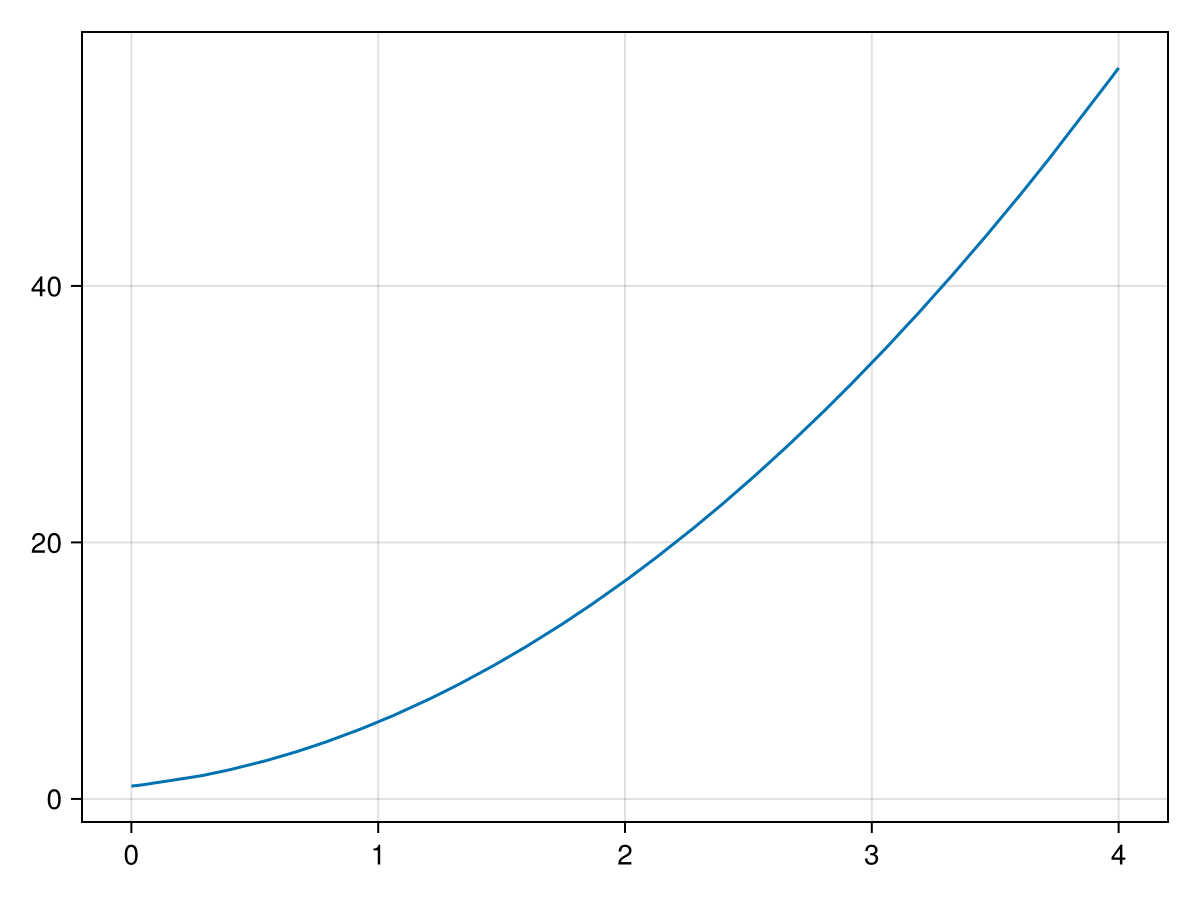

In [25]:
lines(0..4,poly1)

### Creating a Plot Recipe for a Triangle

Let's say that we have a Triangle object that stores the three vertices as tuples.  We can define it this way:


In [26]:
struct Triangle{T <: Real}
  pt1::Tuple{T,T}
  pt2::Tuple{T,T}
  pt3::Tuple{T,T}
end

where you can make a Triangle of tuples of numbers as long as all numbers are the same time.  (Note: this can be generalized a bit using multiple parametric types)

Additionally, let's say we have a `Base.show` method as the following:

In [27]:
Base.show(io::IO, tri::Triangle) = print(io, "Δ[$(tri.pt1), $(tri.pt2), $(tri.pt3)]")

And we can make a triangle with:

In [28]:
tri = Triangle((0,0),(0,3),(4,0))

Δ[(0, 0), (0, 3), (4, 0)]

If we wish to plot the triangle we will first define the plot type by the following:

In [29]:
Makie.plottype(::Triangle) = Makie.Lines

Where we need to let `Makie` know the type of plot that we want to override.  

Additionally we need to write something with the `convert_arguments` for this datatype.  The following is a template:

In [33]:
function Makie.convert_arguments(S::Type{<:Lines}, tri::Triangle)
    xpts = [tri.pt1[1], tri.pt2[1], tri.pt3[1], tri.pt1[1]]
    ypts = [tri.pt1[2], tri.pt2[2], tri.pt3[2], tri.pt1[2]]
    Makie.convert_arguments(S, xpts, ypts)
end

And then we can make a plot with

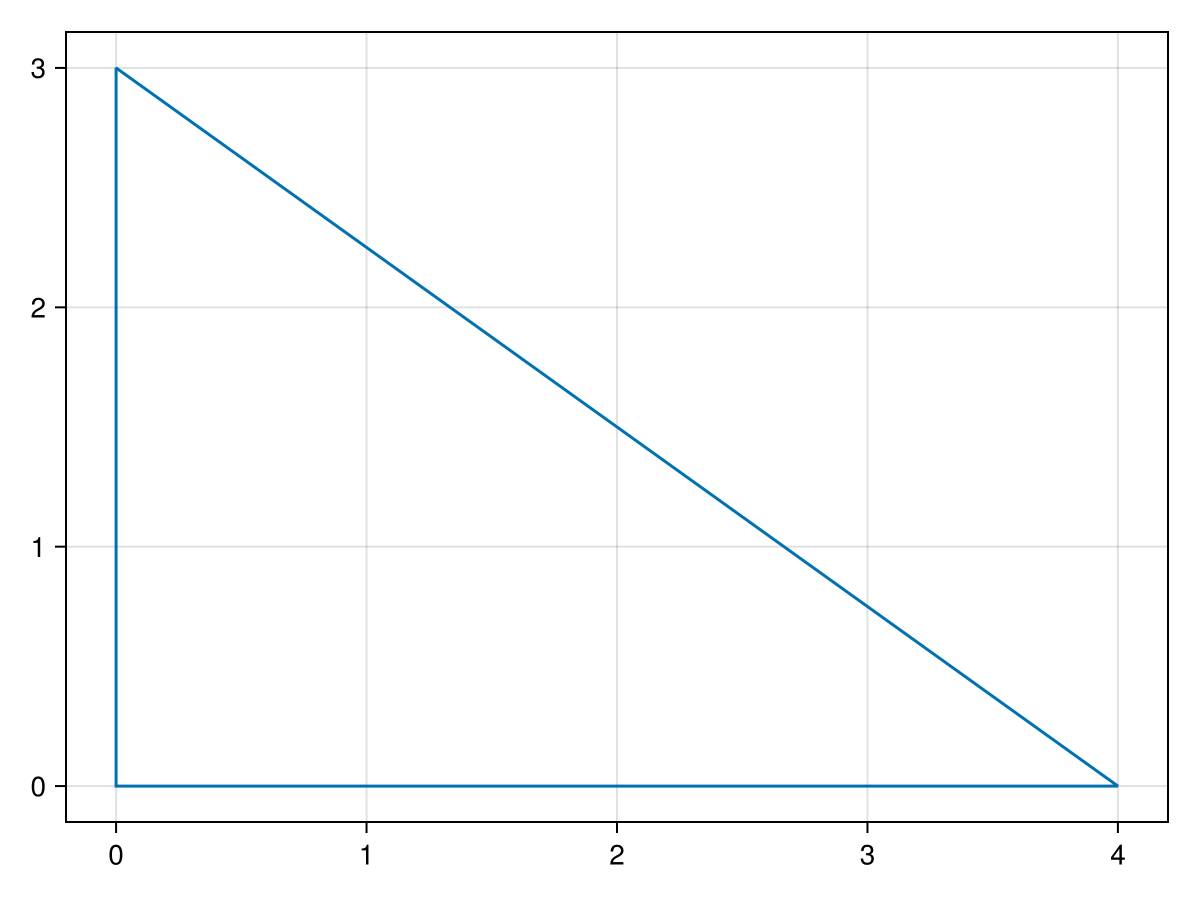

In [34]:
lines(tri)

#### Exercise

Update the `lines` command above to do the following.  Note: you don't have to update the `convert_arguments` above.  Look up the documentation on `lines` on how to make changes. 

- change the color of the triangle
- make the lines thicker.  